In [1]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

Click on all packages->download

In [2]:
#To view all the functions and attributes and the methods within this package
dir(nltk)

['ARLSTem',
 'ARLSTem2',
 'AbstractLazySequence',
 'AffixTagger',
 'AlignedSent',
 'Alignment',
 'AnnotationTask',
 'ApplicationExpression',
 'Assignment',
 'BigramAssocMeasures',
 'BigramCollocationFinder',
 'BigramTagger',
 'BinaryMaxentFeatureEncoding',
 'BlanklineTokenizer',
 'BllipParser',
 'BottomUpChartParser',
 'BottomUpLeftCornerChartParser',
 'BottomUpProbabilisticChartParser',
 'Boxer',
 'BrillTagger',
 'BrillTaggerTrainer',
 'CFG',
 'CRFTagger',
 'CfgReadingCommand',
 'ChartParser',
 'ChunkParserI',
 'ChunkScore',
 'Cistem',
 'ClassifierBasedPOSTagger',
 'ClassifierBasedTagger',
 'ClassifierI',
 'ConcordanceIndex',
 'ConditionalExponentialClassifier',
 'ConditionalFreqDist',
 'ConditionalProbDist',
 'ConditionalProbDistI',
 'ConfusionMatrix',
 'ContextIndex',
 'ContextTagger',
 'ContingencyMeasures',
 'CoreNLPDependencyParser',
 'CoreNLPParser',
 'Counter',
 'CrossValidationProbDist',
 'DRS',
 'DecisionTreeClassifier',
 'DefaultTagger',
 'DependencyEvaluator',
 'DependencyG

# parts-of-speech tagging
- Part of speech tagging(POS) tagging,involves the process of assigning specific parts of  speech(e.g.,nouns,verbs,addverbs,prepositions,articles,pronouns) to each word in a given text.The goal is to analyze the grammatical structure of a sentence.
- For ex-
Sentence:"She quickly ran to the store."

POS Tagging

- "She" -> Pronoun

- "quickly" -> Adverb

- "ran" -> Verb

- "to" -> Preposition

- "the" -> Article 

- "store" -> Noun

- "to" -> Preposition


# What can you do with NLTK(Natural Language Toolkit)?

Stopwords
-These are words that are used very frequently but they don't really contribute much to the meaning of the sentence.They are also used to get rid of sentiment-neutral words in a piece of text and it is completely alright to drop such words.

In [3]:
from nltk.corpus import stopwords

stopwords.words('english')[0:500:25]

['i', 'herself', 'been', 'with', 'here', 'very', 'doesn', 'won']

Reading in text data

- Most text data lacks the formal structure of numeric data.                    
- E.g., 80% of business-relevant information orginates in unstructured form,primarily text.              
- Text data will typically be in a semi-structured or unstructured format.
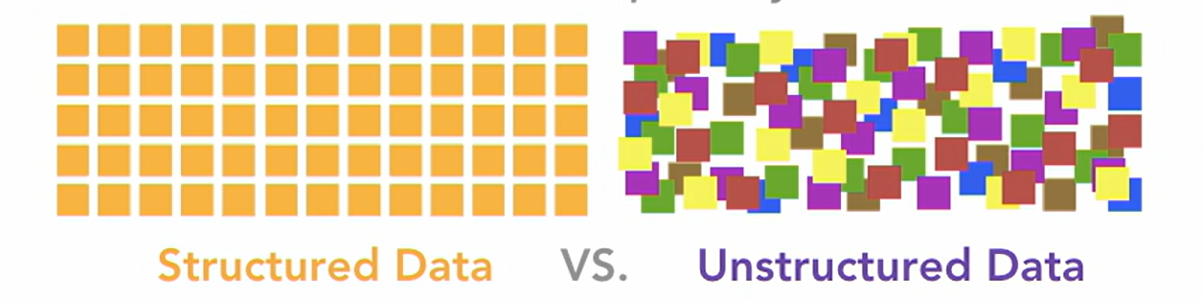

What does unstructured mean?What makes a file unstructed?  
- Binary data  
- No delimiters  
- No indication of rows

# Read in semi-structured text data
Dataset-It was collected from UCI Machine Learning Repository.This dataset is a collection of text messages each with a label of either spam or ham.

In [4]:
#Read in the raw text to get the first look of the data,so just opening it and reading it.
rawData=open("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv").read()

In [5]:
#Print the raw data-This will print out the first 500 characters.
rawData[0:500]

"ham\tI've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.\nspam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\nham\tNah I don't think he goes to usf, he lives around here though\nham\tEven my brother is not like to speak with me. They treat me like aid"

Converting the text corpus into components of a list.  
- This is done by replacing tabspace('\t') with a new line character('\n') followed by splitting the text corpus or creating the components of the list by splitting it on the basis of a newline charater.SO whenever it parses a new line character('\n') it will split the text to form components which are then appended to a list.This is done to structure the format of the unstructred text file so as to enhance readibility of the file.

In [6]:
parseData=rawData.replace('\t','\n')
parseData=parseData.split('\n')

In [7]:
parseData[0:5]

['ham',
 "I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.",
 'spam',
 "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's",
 'ham']

In [8]:
labelList=parseData[0::2] #Listing all the labels
textList=parseData[1::2]  #Listing the text for each label

In [9]:
print(labelList[0:5])

['ham', 'spam', 'ham', 'ham', 'ham']


In [10]:
print(textList[0:5])

["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.", "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's", "Nah I don't think he goes to usf, he lives around here though", 'Even my brother is not like to speak with me. They treat me like aids patent.', 'I HAVE A DATE ON SUNDAY WITH WILL!!']


In [11]:
print(f"labelList length-{len(labelList)}")
print(f"textList length-{len(textList)}")

labelList length-5571
textList length-5570


In [12]:
print(labelList[-5:])

['ham', 'ham', 'ham', 'ham', '']


In [13]:
import pandas as pd

In [14]:
#creating a dataframe in order to structure the format.
fullCorpus=pd.DataFrame({'label':labelList[:-1],'body_list':textList})

In [15]:
fullCorpus.head()

,label,body_list
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [16]:
fullCorpus.tail()

,label,body_list
5565,spam,This is the 2nd time we have tried 2 contact u...
5566,ham,Will Ã¼ b going to esplanade fr home?
5567,ham,"Pity, * was in mood for that. So...any other s..."
5568,ham,The guy did some bitching but I acted like i'd...
5569,ham,Rofl. Its true to its name


Shortcut  
-sep='\t', indicates that the values in the file are seperated by tabs(tab seperated values), rather than commas delimiter.  
-header=None, because there are no columns in this file and if the header was not set to None pandas would have assumed the first sentence of the file to be the column names.

In [17]:
dataset=pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t',header=None)

In [18]:
dataset.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [19]:
#Renaming the column labels
dataset.tail()

,0,1
5563,spam,This is the 2nd time we have tried 2 contact u...
5564,ham,Will ü b going to esplanade fr home?
5565,ham,"Pity, * was in mood for that. So...any other s..."
5566,ham,The guy did some bitching but I acted like i'd...
5567,ham,Rofl. Its true to its name


In [20]:
fullCorpus=pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t',header=None)
fullCorpus.columns=['label','body_text']
fullCorpus.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


# Explore the dataset 

Shape of the dataset

In [21]:
print("Input data has {} rows and {} columns".format(len(fullCorpus),len(fullCorpus.columns)))

Input data has 5568 rows and 2 columns


How many are spam and ham

In [22]:
print("Out of {} rows {} are spam and {} are ham".format(len(fullCorpus),
                                                         len(fullCorpus[fullCorpus['label']=='spam']),
                                                         len(fullCorpus[fullCorpus['label']=='ham'])))

Out of 5568 rows 746 are spam and 4822 are ham


How many nulls?

In [23]:
print("Number of nulls in the  label:{}".format(fullCorpus['label'].isnull().sum()))
print("Number of nulls in the text:{}".format(fullCorpus['body_text'].isnull().sum()))

Number of nulls in the  label:0
Number of nulls in the text:0


In [24]:
labels=fullCorpus[fullCorpus['label']=='spam']
print(labels)

     label                                          body_text
1     spam  Free entry in 2 a wkly comp to win FA Cup fina...
6     spam  WINNER!! As a valued network customer you have...
7     spam  Had your mobile 11 months or more? U R entitle...
9     spam  SIX chances to win CASH! From 100 to 20,000 po...
10    spam  URGENT! You have won a 1 week FREE membership ...
...    ...                                                ...
5533  spam  Want explicit SEX in 30 secs? Ring 02073162414...
5536  spam  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5543  spam  Had your contract mobile 11 Mnths? Latest Moto...
5562  spam  REMINDER FROM O2: To get 2.50 pounds free call...
5563  spam  This is the 2nd time we have tried 2 contact u...

[746 rows x 2 columns]


In [25]:
text=fullCorpus[fullCorpus['label']=='ham']
print(text)

     label                                          body_text
0      ham  I've been searching for the right words to tha...
2      ham  Nah I don't think he goes to usf, he lives aro...
3      ham  Even my brother is not like to speak with me. ...
4      ham                I HAVE A DATE ON SUNDAY WITH WILL!!
5      ham  As per your request 'Melle Melle (Oru Minnamin...
...    ...                                                ...
5561   ham                                       Huh y lei...
5564   ham               Will ü b going to esplanade fr home?
5565   ham  Pity, * was in mood for that. So...any other s...
5566   ham  The guy did some bitching but I acted like i'd...
5567   ham                         Rofl. Its true to its name

[4822 rows x 2 columns]


Regular Expressions (Regex)   
- Text string for describing a search pattern  
For ex-This regular expression 'nlp' will just search for the explicit "nlp" string within some other string.     
 - '[j-q]', this will just search for all single characters between 'j' and 'q' and whatever text we're looking at.
 - '[j-q]+', this can search for strings longer than 1 character.
 - '[0-9]+', this will return more than one number and not just a single number.
 - '[j-q0-9]', if we have 'nlp2017',then it would return the full string,but if you had 'nlp 2017' then it would return 2 
      seperate sequences.
      
Why are Regular Expressions Useful?  
- Identifying whitespace between words/tokens  
- Identifying/creating delimiters or end-of-line escape characters  
- Removing punction or numbers from your text  
- Cleaning HTML tags from text  
- Identifying some textual patterns you're interested in

Use cases
- Confirming passwords meet criteria
- Searching URL for some substring
- Searching for files on your computer
- Document scrapping

# Learning how to use regular expressions

In [26]:
import re

re_test = 'This is a made up string to test 2 different regex methods'
re_test_messy = 'This      is a made up    string to test 2     different regex methods'
re_test_messy1 = 'This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods'

Method 1

Splitting a sentence into a list of words

In [27]:
#Lets try it on re_test
re.split('\s',re_test) #wherever there is a white space

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [28]:
re.split('\s',re_test_messy)

['This',
 '',
 '',
 '',
 '',
 '',
 'is',
 'a',
 'made',
 'up',
 '',
 '',
 '',
 'string',
 'to',
 'test',
 '2',
 '',
 '',
 '',
 '',
 'different',
 'regex',
 'methods']

In [29]:
re.split('\s+',re_test_messy) #\s+ for more than one character space

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [30]:
re.split('\s+',re_test_messy1)

['This-is-a-made/up.string*to>>>>test----2""""""different~regex-methods']

In [31]:
re.split('\W+',re_test_messy1)    #'\W' for a non-word character(' ',-,>,"qoutes period",/,~)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

- Using the split method allows us to tokenize by finding out charaters that seperates the words.  
- The other option is,instead of searching for what seperate the words,just search for the actual words themselves and ignore the   characters that split the words.

In [32]:
re.findall('\S',re_test)

['T',
 'h',
 'i',
 's',
 'i',
 's',
 'a',
 'm',
 'a',
 'd',
 'e',
 'u',
 'p',
 's',
 't',
 'r',
 'i',
 'n',
 'g',
 't',
 'o',
 't',
 'e',
 's',
 't',
 '2',
 'd',
 'i',
 'f',
 'f',
 'e',
 'r',
 'e',
 'n',
 't',
 'r',
 'e',
 'g',
 'e',
 'x',
 'm',
 'e',
 't',
 'h',
 'o',
 'd',
 's']

In [33]:
re.findall('\S+',re_test)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [34]:
re.findall('\S+',re_test_messy)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

In [35]:
re.findall('\W+',re_test_messy1)

['-', '-', '-', '/', '.', '*', '>>>>', '----', '""""""', '~', '-']

In [36]:
re.findall('\W',re_test_messy1)

['-',
 '-',
 '-',
 '/',
 '.',
 '*',
 '>',
 '>',
 '>',
 '>',
 '-',
 '-',
 '-',
 '-',
 '"',
 '"',
 '"',
 '"',
 '"',
 '"',
 '~',
 '-']

In [37]:
re.findall('\S',re_test_messy1)

['T',
 'h',
 'i',
 's',
 '-',
 'i',
 's',
 '-',
 'a',
 '-',
 'm',
 'a',
 'd',
 'e',
 '/',
 'u',
 'p',
 '.',
 's',
 't',
 'r',
 'i',
 'n',
 'g',
 '*',
 't',
 'o',
 '>',
 '>',
 '>',
 '>',
 't',
 'e',
 's',
 't',
 '-',
 '-',
 '-',
 '-',
 '2',
 '"',
 '"',
 '"',
 '"',
 '"',
 '"',
 'd',
 'i',
 'f',
 'f',
 'e',
 'r',
 'e',
 'n',
 't',
 '~',
 'r',
 'e',
 'g',
 'e',
 'x',
 '-',
 'm',
 'e',
 't',
 'h',
 'o',
 'd',
 's']

In [38]:
re.findall('\w+',re_test_messy1)

['This',
 'is',
 'a',
 'made',
 'up',
 'string',
 'to',
 'test',
 '2',
 'different',
 'regex',
 'methods']

Take aways
Usefull methods for tokenizing  
- findall()  
- split()  


Usefull regexes for tokenizing  
- '\W' and '\w'-words  
- '\S' and '\s'-spaces  

# Replacing a specific string

In [39]:
pep8_test='I try to follow PEP8 guidelines'
pep7_test='I try to follow PEP7 guidelines'
peep8_test='I try to follow PEEP8 guidelines'

In [40]:
re.findall('[a-z]+',pep8_test)   #It is case sensitive and hence eliminates upper case characters.

['try', 'to', 'follow', 'guidelines']

In [41]:
re.findall('[A-Z]+',pep8_test)

['I', 'PEP']

In [42]:
re.findall('[A-Z0-9]+',pep8_test) #This gives words with capital letters or numbers

['I', 'PEP8']

In [43]:
re.findall('[A-Z]+[0-9]+',pep8_test)  #This gives words with capital letters and numbers

['PEP8']

Searching and replacing

In [44]:
re.sub('[A-Z]+[0-9]+','PEP8 Python Styleguide',pep8_test)

'I try to follow PEP8 Python Styleguide guidelines'

Other examples of regex methods
- re.search()
- re.match()
- re.fullmatch()
- re.finditer()
- re.escape()

Machine Learning Pipeline
- Raw text - model can't distinguish words
- Tokenize - tell the model what to look at
- Clean text - remove stop words/punctuation,stemming,etc.
- Vectorize - convert to numeric form (create a matrix where the columns represent words and rows represent text messages)
 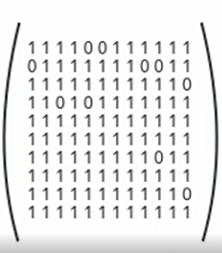
- Machine learning algorithm - fit/train model

# Implementing a pipeline to clean text

### Pre-processing text data

- Cleaning up the text data is necessary to highlight attributes that you want you're machine learning system to pick up on.Cleaning (or pre-processing) the data typically consists of a number of steps:
  1. #### Remove punctuation
  2. #### Tokenization
  3. #### Remove stopwords
  4. #### lemmatize/Stem

In [45]:
import pandas as pd

data=pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t',header=None)
data.head()

,0,1
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [46]:
data.columns=['label','body_text']

In [47]:
data.head()

,label,body_text
0,ham,I've been searching for the right words to tha...
1,spam,Free entry in 2 a wkly comp to win FA Cup fina...
2,ham,"Nah I don't think he goes to usf, he lives aro..."
3,ham,Even my brother is not like to speak with me. ...
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


In [48]:
pd.set_option('display.max_colwidth',100)

In [49]:
data.head()

,label,body_text
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
2,ham,"Nah I don't think he goes to usf, he lives around here though"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!


### Remove punctuation

In [50]:
import string  # We need to show python what a punctuation looks like before asking it to remove it.
string.punctuation # This is really helpful for python to identify what we are looking for.

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
# For us,
"I love NLP."=="I love NLP"
# But for python it doesn't hold the same meaning.So, we should make python ignore this.

False

In [52]:
def remove_punct(text):
    text_nopunct = [char for char in text if char not in string.punctuation]
    return text_nopunct  #This will return characters from all the characters in the text that are'nt punctuations.

In [53]:
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

In [54]:
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,"[I, v, e, , b, e, e, n, , s, e, a, r, c, h, i, n, g, , f, o, r, , t, h, e, , r, i, g, h, t,..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[F, r, e, e, , e, n, t, r, y, , i, n, , 2, , a, , w, k, l, y, , c, o, m, p, , t, o, , w,..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[N, a, h, , I, , d, o, n, t, , t, h, i, n, k, , h, e, , g, o, e, s, , t, o, , u, s, f, ,..."
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[E, v, e, n, , m, y, , b, r, o, t, h, e, r, , i, s, , n, o, t, , l, i, k, e, , t, o, , s,..."
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, , H, A, V, E, , A, , D, A, T, E, , O, N, , S, U, N, D, A, Y, , W, I, T, H, , W, I, L, L]"


In [55]:
def remove_punct(text):
    text_nopunct = "".join([char for char in text if char not in string.punctuation])
    return text_nopunct

In [56]:
data['body_text_clean'] = data['body_text'].apply(lambda x: remove_punct(x))

In [57]:
data.head()

,label,body_text,body_text_clean
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL


### Tokenization

In [58]:
import re

def tokenize(text):
    tokens = re.split('\W+',text)
    return tokens

In [59]:
data['body_text_tokenized'] = data['body_text_clean'].apply(lambda x: tokenize(x.lower()))

In [60]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]"


In [61]:
"NLP"=="nlp"

False

- We know that they mean the same and we don't want python to waste it's resources in understanding that they mean the same, so we explicitely tell python that they mean the same.

### Remove stopwords

In [62]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [63]:
def remove_stopwords(tokenized_list):
    text = [word for word in tokenized_list if word not in stopwords]
    return text

data['body_text_nostop'] = data['body_text_tokenized'].apply(lambda x: remove_stopwords(x)) 
#So this will apply the function on each row of this column

In [64]:
data.head()

,label,body_text,body_text_clean,body_text_tokenized,body_text_nostop
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take yo...,Ive been searching for the right words to thank you for this breather I promise i wont take your...,"[ive, been, searching, for, the, right, words, to, thank, you, for, this, breather, i, promise, ...","[ive, searching, right, words, thank, breather, promise, wont, take, help, granted, fulfil, prom..."
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005 Text FA to 87121 to receive e...,"[free, entry, in, 2, a, wkly, comp, to, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, to...","[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
2,ham,"Nah I don't think he goes to usf, he lives around here though",Nah I dont think he goes to usf he lives around here though,"[nah, i, dont, think, he, goes, to, usf, he, lives, around, here, though]","[nah, dont, think, goes, usf, lives, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,Even my brother is not like to speak with me They treat me like aids patent,"[even, my, brother, is, not, like, to, speak, with, me, they, treat, me, like, aids, patent]","[even, brother, like, speak, treat, like, aids, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,I HAVE A DATE ON SUNDAY WITH WILL,"[i, have, a, date, on, sunday, with, will]","[date, sunday]"


## Stemming

- Process of reducing inflected(or sometimes derived) words to their word stem or root.
- Crudely chopping off the end of the word to leave only the base.
- Stemming examples
    - Stemming/Stemmed : Stem
    - Electricity/electrical : electr
    - Berries/berry : Berri
    - Connection/connected/connective : Connect
- Drawbacks
    - Meanness/meaning : Mean
- So, it is crudely chopping out end letters without actually understanding their roots.
- The idea is to allow python to only remeber a few words and not waste memory in storing every variation of words with same meaning.
- Reduces the corpus of words the model is exposed to.
- Explicitley correlates words with similar meanings.

- Some Stemmers:
    - Porter Stemmer
    - Snowball Stemmer
    - Landcaster Stemmer
    - Regex-Based Stemmer

## Supplemental Data Cleaning: Using Stemming

### Test out Porter stemmer

In [65]:
import nltk

ps = nltk.PorterStemmer()

In [66]:
dir(ps)

['MARTIN_EXTENSIONS',
 'NLTK_EXTENSIONS',
 'ORIGINAL_ALGORITHM',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_apply_rule_list',
 '_contains_vowel',
 '_ends_cvc',
 '_ends_double_consonant',
 '_has_positive_measure',
 '_is_consonant',
 '_measure',
 '_replace_suffix',
 '_step1a',
 '_step1b',
 '_step1c',
 '_step2',
 '_step3',
 '_step4',
 '_step5a',
 '_step5b',
 'mode',
 'pool',
 'stem',
 'vowels']

In [67]:
print(ps.stem('grows'))
print(ps.stem('growing'))
print(ps.stem('grow'))

grow
grow
grow


In [68]:
print(ps.stem('run'))
print(ps.stem('running'))
print(ps.stem('runner'))

run
run
runner


In [69]:
print(ps.stem('meaning'))
print(ps.stem('meanness'))
print(ps.stem('mean'))

mean
mean
mean


In [70]:
import pandas as pd
import re
import string

pd.set_option('display.max_colwidth',100)

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns=['label','body_text']
data.head()

,label,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


In [71]:
stopwords = nltk.corpus.stopwords.words('english')

### Clean up text

In [72]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stopwords]
    return text


In [73]:
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x.lower()))

In [74]:
data.head()

,label,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr..."


### Stem text

In [75]:
def stemming(tokenized_text):
    text = [ps.stem(word) for word in tokenized_text]
    return text

In [76]:
data['body_text_stemmed'] = data['body_text_nostop'].apply(lambda x: stemming(x))

In [77]:
data.head()

,label,body_text,body_text_nostop,body_text_stemmed
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[free, entry, 2, wkly, comp, win, fa, cup, final, tkts, 21st, may, 2005, text, fa, 87121, receiv...","[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv,..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goes, usf, lives, around, though]","[nah, dont, think, goe, usf, live, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aids, patent]","[even, brother, like, speak, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]","[date, sunday]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[per, request, melle, melle, oru, minnaminunginte, nurungu, vettam, set, callertune, callers, pr...","[per, request, mell, mell, oru, minnaminungint, nurungu, vettam, set, callertun, caller, press, ..."


- Clearly, stemming is not perfect for all the cases,like goes has been stemmed to goe which has no meaning.

### Lemmatizing

 - Process of grouping together the inflected forms of a word so they can be analyzed as a single term, identified by the word's lemma
 - Lemma is a canonical form of a set of words
 - For instance type,typed, and typing will all be forms of the same lemma.
 - Using vocabulary analysis of words aiming to remove inflectional endings to return the dictionary form of a word.

How is Lemmatizing different from Stemming?
- The goal of both is to condense derived words into their base forms.

- Stemming is typically faster as it simply chops off the end of a word using heuristics, without any understanding of the context in which a word is used.
- Lemmatizing is typically more accurate as it uses more informed analysis to create groups of words with similar meaning based on the context around the word.

## Supplemental Data Cleaning: Using a Lemmatizer

### Test out WordNet lemmatizer

In [78]:
import nltk

wn = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

In [79]:
dir(wn)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'lemmatize']

In [80]:
print(ps.stem('meanness'))
print(ps.stem('meaning'))

mean
mean


In [81]:
print(wn.lemmatize('meanness'))
print(wn.lemmatize('meaning'))

meanness
meaning


- So you see lemmatizer is a bit more accurate than stemming as it returns the words without chopping if they don't belong to the same group.It takes a lil more longer than stemming as stemming simply uses heuristics.

In [82]:
print(ps.stem('goose'))
print(ps.stem('geese'))

goos
gees


In [83]:
print(wn.lemmatize('goose'))
print(wn.lemmatize('geese'))

goose
goose


### Read in raw text

In [84]:
import pandas as pd
import re
import string
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')

data.columns = ['labels','body_text']
data.head()

,labels,body_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...
1,ham,"Nah I don't think he goes to usf, he lives around here though"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...


### Clean up text

In [85]:
def clean_text(text):
    text = "".join([word for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [word for word in tokens if word not in stopwords]
    return text

In [86]:
data['body_text_nostop'] = data['body_text'].apply(lambda x: clean_text(x))

In [87]:
data.head()

,labels,body_text,body_text_nostop
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."


### Lemmatize text

In [88]:
def lemmatizing(tokenized_text):
    text = [wn.lemmatize(word) for word in tokenized_text]
    return text

In [89]:
data['body_text_lemmatize'] = data['body_text_nostop'].apply(lambda x: lemmatizing(x))

In [90]:
data.head(10)

,labels,body_text,body_text_nostop,body_text_lemmatize
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,"[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv...","[Free, entry, 2, wkly, comp, win, FA, Cup, final, tkts, 21st, May, 2005, Text, FA, 87121, receiv..."
1,ham,"Nah I don't think he goes to usf, he lives around here though","[Nah, I, dont, think, goes, usf, lives, around, though]","[Nah, I, dont, think, go, usf, life, around, though]"
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[Even, brother, like, speak, They, treat, like, aids, patent]","[Even, brother, like, speak, They, treat, like, aid, patent]"
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]","[I, HAVE, A, DATE, ON, SUNDAY, WITH, WILL]"
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,"[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers...","[As, per, request, Melle, Melle, Oru, Minnaminunginte, Nurungu, Vettam, set, callertune, Callers..."
5,spam,WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To c...,"[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,...","[WINNER, As, valued, network, customer, selected, receivea, 900, prize, reward, To, claim, call,..."
6,spam,Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with came...,"[Had, mobile, 11, months, U, R, entitled, Update, latest, colour, mobiles, camera, Free, Call, T...","[Had, mobile, 11, month, U, R, entitled, Update, latest, colour, mobile, camera, Free, Call, The..."
7,ham,"I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried ...","[Im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, Ive, cried, enough, today]","[Im, gonna, home, soon, dont, want, talk, stuff, anymore, tonight, k, Ive, cried, enough, today]"
8,spam,"SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, ...","[SIX, chances, win, CASH, From, 100, 20000, pounds, txt, CSH11, send, 87575, Cost, 150pday, 6day...","[SIX, chance, win, CASH, From, 100, 20000, pound, txt, CSH11, send, 87575, Cost, 150pday, 6days,..."
9,spam,"URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM...","[URGENT, You, 1, week, FREE, membership, 100000, Prize, Jackpot, Txt, word, CLAIM, No, 81010, TC...","[URGENT, You, 1, week, FREE, membership, 100000, Prize, Jackpot, Txt, word, CLAIM, No, 81010, TC..."


- Just like stemmer the lemmatizer wont't do particularly well with slang abbreviations.So, its not ideal for this dataset

## Vectorizing

- Process of encoding text as integers to create feature vectors.  
- Feature vector
    - An n-dimensional vector of numerical features that represent some object.
    - So, we will be taking an individual text message and converting it to a numeric vector that represents that text message.
- So, we are taking this dataset that has one line per document with the cell entry as the actual text message and then we are converting it to a matrix that still has one line per document, but then you have every word used across all documents as the columns of your matrix.And then within each cell is counting how many times how many times that certain word appeared in that document.And this is called document-term matrix.
- When looking at a word, Python only sees a string of characters
- Raw text needs to be converted to numbers so that Python and the algorithms used for machine learning can understand
- So we vectorize this text to create a matrix that only has numeric entries.In this case, counting how many times each word appears in each text message.
- The machine learnig algorithm understands these counts.
- Different types
    - Count vectorization
    - N-grams
    - Term frequency - inverse document frequency (TF-IDF)

## Vectorizing Raw Data: Count Vectorization

### Count vectorization

- Create a document- term matrix where the entry of each cell will be a count of the number of times that word occured in that document.

### Read in text

In [91]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer() #Just because its a lil faster

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['labels','body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [92]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply CountVectorizer

In [93]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer=clean_text)
X_counts = count_vect.fit_transform(data['body_text'])

In [94]:
print(X_counts.shape)  #To get how many rows or text messages and how many unique words exist in those text corpuses

(5567, 8104)


In [95]:
print(count_vect.get_feature_names())  #This prints all the unique words of this text file.
# If this does'nt work use 'count_vect.get_feature_names_out()'.

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Apply CountVectorizer to smaller sample

In [96]:
data_sample = data[0:20]

count_vect_sample = CountVectorizer(analyzer = clean_text)
X_counts_sample = count_vect_sample.fit_transform(data_sample['body_text'])

In [97]:
print(X_counts_sample.shape)

(20, 192)


In [98]:
print(count_vect_sample.get_feature_names())

['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'name', 'nati

### Vectorizer output sparse matrices


Sparse Matrix:   A matrix in which entries are 0. In the interest of efficient storage, a sparse matrix will be only storing the locations of the non-zero elements.

In [99]:
X_counts_sample #This will just say that it is a sparse matrix

<20x192 sparse matrix of type '<class 'numpy.int64'>'
	with 218 stored elements in Compressed Sparse Row format>

In [100]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())         
#So, now for each row instead of just storing the non-zero elements, it adds those 0's back in there.We have a full array that is 192entries long.

In [101]:
X_counts_df

,0,1,2,3,4,5,6,7,8,9,...,182,183,184,185,186,187,188,189,190,191
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


In [102]:
X_counts_df.columns = count_vect_sample.get_feature_names_out()

In [103]:
X_counts_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,1,1,...,0,1,0,0,0,0,0,0,0,0
9,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,1,1,0,0,0,0


- The words win and wkli appear in the first text message.
- The words wet,winner and word don't appear in the first text message.

## Vectorizing Raw Data: N-Grams

### N-Grams

- Creating a document-term matrix where counts still occupy the cell but instead of the columns representing single terms, they represent all combinations of adjacent words of length n in your text.For example, Google's auto complete uses N-Grams

In [104]:
import pandas as pd
import re
import string
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [105]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)  #This is just for the sake of creating a list of tokens for the purpose of stemming. 
    text = " ".join([ps.stem(word) for word in tokens if word not in stopwords])
    return text

In [106]:
data['cleaned_text'] = data['body_text'].apply(lambda x: clean_text(x))

In [107]:
data.head()

,label,body_text,cleaned_text
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd...
1,ham,"Nah I don't think he goes to usf, he lives around here though",nah dont think goe usf live around though
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,even brother like speak treat like aid patent
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,date sunday
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,per request mell mell oru minnaminungint nurungu vettam set callertun caller press 9 copi friend...


### Apply CountVectorizezr (w/ N-Grams)

In [108]:
from sklearn.feature_extraction.text import CountVectorizer

ngram_vect = CountVectorizer(ngram_range=(2,2))  
#These number indicate n-grams like uni-grams for 1,bi-grams for 2,tri-grams for 3 and so on.In this case we only want bi-grams.

In [109]:
X_counts = ngram_vect.fit_transform(data['cleaned_text'])

In [110]:
print(X_counts.shape)

(5567, 31260)


In [111]:
print(ngram_vect.get_feature_names())

['008704050406 sp', '0089mi last', '0121 2025050', '01223585236 xx', '01223585334 cum', '0125698789 ring', '02 user', '020603 2nd', '0207 153', '02072069400 bx', '02073162414 cost', '02085076972 repli', '020903 2nd', '021 3680', '021 3680offer', '050703 tcsbcm4235wc1n3xx', '06 good', '07046744435 arrang', '07090298926 reschedul', '07099833605 reschedul', '07123456789 87077', '0721072 find', '07732584351 rodger', '07734396839 ibh', '07742676969 show', '07753741225 show', '0776xxxxxxx uve', '077xxx 2000', '07801543489 guarante', '07808 xxxxxx', '07808247860 show', '07808726822 award', '07815296484 show', '0784987 show', '0789xxxxxxx today', '0796xxxxxx today', '07973788240 show', '07xxxxxxxxx 2000', '07xxxxxxxxx show', '0800 0721072', '0800 169', '0800 18', '0800 195', '0800 1956669', '0800 505060', '0800 542', '08000407165 18', '08000776320 repli', '08000839402 2stoptx', '08000839402 2stoptxt', '08000839402 call', '08000839402 call2optout4qf2', '08000839402 call2optoutf4q', '08000839402

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Apply CountVectorizer (w/ N-Grams) to smaller sample

In [112]:
data_sample = data[0:20]

In [113]:
ngram_vect_sample = CountVectorizer(ngram_range=(2,2))
X_counts_sample = ngram_vect_sample.fit_transform(data_sample['cleaned_text'])

In [114]:
print(X_counts_sample.shape)

(20, 198)


In [115]:
print(ngram_vect_sample.get_feature_names_out())

['09061701461 claim' '100 20000' '100000 prize' '11 month' '12 hour'
 '150pday 6day' '16 tsandc' '20000 pound' '2005 text' '21st may'
 '4txtú120 poboxox36504w45wq' '6day 16' '81010 tc' '87077 eg'
 '87077 trywal' '87121 receiv' '87575 cost' '900 prize' 'aft finish'
 'aid patent' 'alright way' 'anymor tonight' 'appli 08452810075over18'
 'appli repli' 'ard smth' 'around though' 'brother like'
 'call 09061701461' 'call mobil' 'caller press' 'callertun caller'
 'camera free' 'cash 100' 'chanc win' 'claim 81010' 'claim call'
 'claim code' 'click httpwap' 'click wap' 'co free' 'code kl341'
 'colour mobil' 'comp win' 'copi friend' 'cost 150pday' 'credit click'
 'cri enough' 'csh11 send' 'cup final' 'custom select' 'da stock'
 'date sunday' 'dont miss' 'dont think' 'dont want' 'eg england'
 'eh rememb' 'england 87077' 'england macedonia' 'enough today'
 'entitl updat' 'entri questionstd' 'entri wkli' 'even brother' 'fa 87121'
 'fa cup' 'feel way' 'ffffffffff alright' 'final tkt' 'fine way'
 'fi

In [116]:
X_counts_df = pd.DataFrame(X_counts_sample.toarray())
X_counts_df.columns = ngram_vect_sample.get_feature_names()

In [117]:
X_counts_df

,09061701461 claim,100 20000,100000 prize,11 month,12 hour,150pday 6day,16 tsandc,20000 pound,2005 text,21st may,...,way meet,week free,win cash,win fa,winner valu,wkli comp,word claim,wwwdbuknet lccltd,xxxmobilemovieclub use,ye naughti
0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,1,1,1,0,0,...,0,0,1,0,0,0,0,0,0,0
9,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,1,0,0


- So, '2005 text' and '21st may' appear only in the first text message and not any other text message.

## TF-IDF Equation

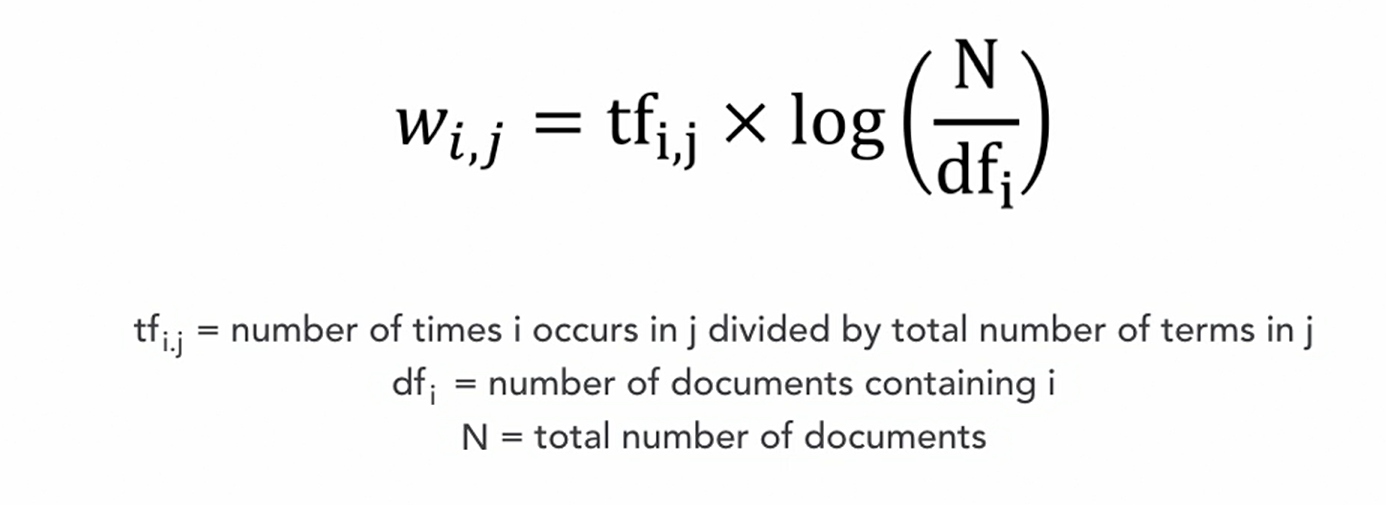

- Tf term is just the number of times that term i occurs in text message j, divided by the number of terms in text message j.So, its just the percent of terms in this given text message that are this specific word.
- The second part of this equation tells us how frequently this word occurs across all other text messages.It calculates the number of text messages in the dataset divided by the number of text messages that this word appears in.That takes the log.As this fraction inside the log gets larger,the log of the fraction also gets larger.
- So, rarer the word is, the higher that this value's going to be.If a word occurs very frequently within a particular text message, it is TF,but very infrequently elsewhere,that's going to be the second term.
- Then a very large number will be assigned and it will be assumed to be very important to differentiating that text message from others.So, it helps you to oull out important but seldom-used words.

### Read in text

In [118]:
import pandas as pd
import re
import string 
import nltk
pd.set_option('display.max_colwidth',100)

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

### Create function to remove punctuation, tokenize, remove stopwords, and stem

In [119]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

### Apply TfidfVectorizer

In [120]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

In [122]:
print(X_tfidf.shape)

(5567, 8104)


In [123]:
print(tfidf_vect.get_feature_names())

['', '0', '008704050406', '0089mi', '0121', '01223585236', '01223585334', '0125698789', '02', '020603', '0207', '02070836089', '02072069400', '02073162414', '02085076972', '020903', '021', '050703', '0578', '06', '060505', '061104', '07008009200', '07046744435', '07090201529', '07090298926', '07099833605', '071104', '07123456789', '0721072', '07732584351', '07734396839', '07742676969', '07753741225', '0776xxxxxxx', '07786200117', '077xxx', '078', '07801543489', '07808', '07808247860', '07808726822', '07815296484', '07821230901', '0784987', '0789xxxxxxx', '0794674629107880867867', '0796xxxxxx', '07973788240', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08002988890', '08006344447', '0808', '08081263000', '08081560665', '0825', '0844', '08448350055', '08448714184', '0845', '08450542832', '08452810071', '08452810073', '08452810075over18', '0870', '08700621170150p', '0870121318

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


### Apply TfidfVectorizer to smaller sample

In [124]:
data_sample = data[0:20]

In [125]:
tfidf_vect_sample = TfidfVectorizer(analyzer = clean_text)
X_tfidf_sample = tfidf_vect_sample.fit_transform(data_sample['body_text'])

In [126]:
print(X_tfidf_sample.shape)

(20, 192)


In [127]:
print(tfidf_vect_sample.get_feature_names())

['08002986030', '08452810075over18', '09061701461', '1', '100', '100000', '11', '12', '150pday', '16', '2', '20000', '2005', '21st', '3', '4', '4403ldnw1a7rw18', '4txtú120', '6day', '81010', '87077', '87121', '87575', '9', '900', 'aft', 'aid', 'alreadi', 'alright', 'anymor', 'appli', 'ard', 'around', 'b', 'brother', 'call', 'caller', 'callertun', 'camera', 'cash', 'chanc', 'claim', 'click', 'co', 'code', 'colour', 'comin', 'comp', 'copi', 'cost', 'credit', 'cri', 'csh11', 'cup', 'custom', 'da', 'date', 'dont', 'eg', 'eh', 'england', 'enough', 'entitl', 'entri', 'even', 'fa', 'feel', 'ffffffffff', 'final', 'fine', 'finish', 'first', 'free', 'friend', 'go', 'goalsteam', 'goe', 'gonna', 'gota', 'ha', 'hl', 'home', 'hour', 'httpwap', 'im', 'info', 'ive', 'jackpot', 'joke', 'k', 'kim', 'kl341', 'lar', 'latest', 'lccltd', 'like', 'link', 'live', 'lor', 'lunch', 'macedonia', 'make', 'may', 'meet', 'mell', 'membership', 'messag', 'minnaminungint', 'miss', 'mobil', 'month', 'nah', 'name', 'nati

In [128]:
X_tfidf_df = pd.DataFrame(X_tfidf_sample.toarray())
X_tfidf_df.columns = tfidf_vect_sample.get_feature_names()

In [129]:
X_tfidf_df

,08002986030,08452810075over18,09061701461,1,100,100000,11,12,150pday,16,...,wet,win,winner,wkli,word,wwwdbuknet,xxxmobilemovieclub,xxxmobilemovieclubcomnqjkgighjjgcbl,ye,ü
0,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.174912,0.000000,0.198986,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.231645,0.000000,0.000000,...,0.000000,0.000000,0.231645,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.197682,0.000000,0.000000,0.000000,0.000000,0.000000,0.197682,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.224905,0.000000,0.000000,0.000000,0.224905,0.197695,...,0.000000,0.197695,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,0.000000,0.000000,0.000000,0.252972,0.000000,0.252972,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.252972,0.252972,0.000000,0.000000,0.000000,0.000000


- This 0.2316 is likely more important than this 0.1977.What that means is, either 12 occurs more frequently in the 5th text message than 11 does in the 6th text message, or it means 12 occurs less frequently across all the other text messages than 11 does across all the other text messages.

## Feature Engineering 

- Creating new features or transforming your existing features to get the most out of your data.

### Creating New Features

- Length of text field
- Percentage of characters that are punctuation in the text
- Percentage of characters that are capitalized

### Transformations

- Power transformations (square, square root, etc.)
- Standardizing data

## Feature Engineering: Feature Creation

### Read in text

In [130]:
import pandas as pd

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

### Create feature for text message length

- We're going to work under the hypothesis that spam messages tend to be longer than real text messages

In [131]:
data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))

In [132]:
data.head()

,label,body_text,body_len
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128
1,ham,"Nah I don't think he goes to usf, he lives around here though",49
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135


### Create feature for % of text that is punctuation

In [133]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

In [134]:
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))


In [135]:
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


- It is assumed that spam messages have greater amount of punctuations.

### Evaluate created features

- After creating the features we must evaluate them to understand how well they contribute in the model predictions.

In [136]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

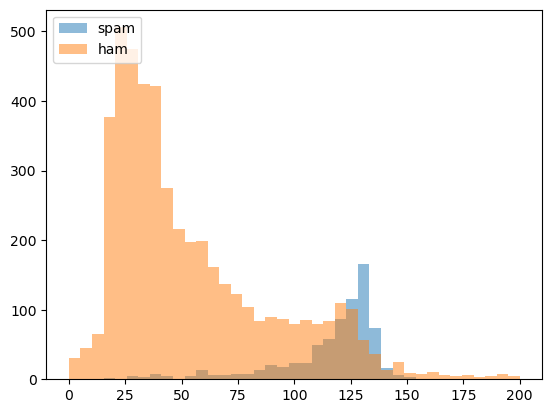

In [140]:
bins = np.linspace(0,200,40)

pyplot.hist(data[data['label']=='spam']['body_len'],bins,alpha=0.5,label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'],bins,alpha=0.5,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

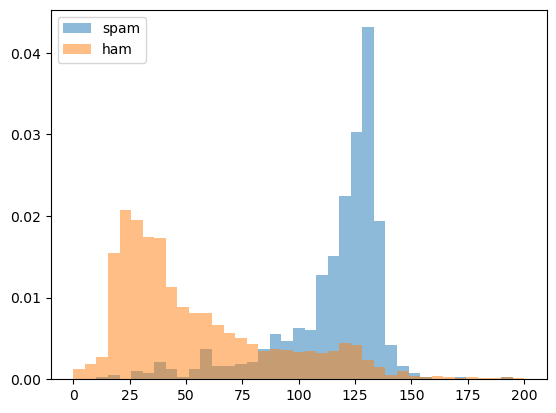

In [145]:
bins = np.linspace(0,200,40)

pyplot.hist(data[data['label']=='spam']['body_len'],bins,alpha=0.5,density=True,label='spam')
pyplot.hist(data[data['label']=='ham']['body_len'],bins,alpha=0.5,density=True,label='ham')
pyplot.legend(loc='upper left')
pyplot.show()

- Clearly, spam mails are lengthier than ham mails.
- For ex- around 40 spam mails have a length of 125-130 characters.
- Bins specify that there are not more than 200 characters and there are about 40 bins with a width of 5 each.This will create an array with 40 evenly spaced numbers.
- Our hypothesis that spam messages tend to be longer than ham messages seems to  be correct based on this evaluation.

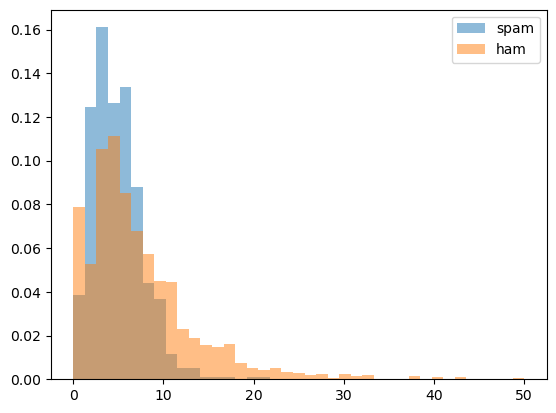

In [148]:
bins = np.linspace(0,50,40)

pyplot.hist(data[data['label']=='spam']['punct%'],bins,density=True,alpha=0.5,label='spam')
pyplot.hist(data[data['label']=='ham']['punct%'],bins,density=True,alpha=0.5,label='ham')
pyplot.legend(loc='upper right')
pyplot.show()

- Our hypothesis that ham messages contain less punctuation than spam messages doesn't appear to be accurate.

## Feature Engineering: Transformations

### Read in text

In [149]:
import pandas as pd

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

### Create the two new features

In [150]:
import string

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))
data.head()

,label,body_text,body_len,punct%
0,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive ...,128,4.7
1,ham,"Nah I don't think he goes to usf, he lives around here though",49,4.1
2,ham,Even my brother is not like to speak with me. They treat me like aids patent.,62,3.2
3,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,28,7.1
4,ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your call...,135,4.4


### Plot the two new features

In [151]:
from matplotlib import pyplot
import numpy as np
%matplotlib inline

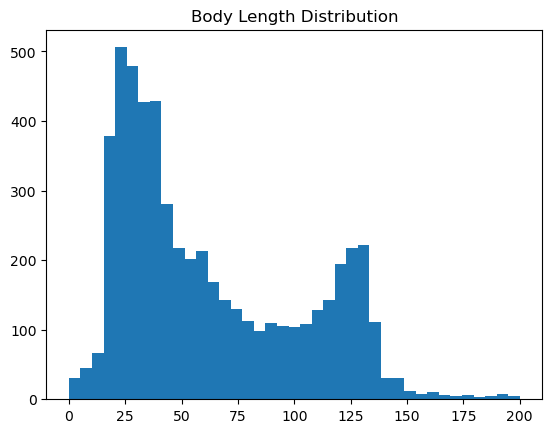

In [152]:
bins = np.linspace(0,200,40)

pyplot.hist(data['body_len'],bins)
pyplot.title("Body Length Distribution")
pyplot.show()

- So, you see its not very skewed and it may not be a good choice to apply transformations.
- So,  you see kind of bimodal distribution here with the two spikes.
- So, its not a very great choice for transformation because its not really skewed and there are not many outliers.

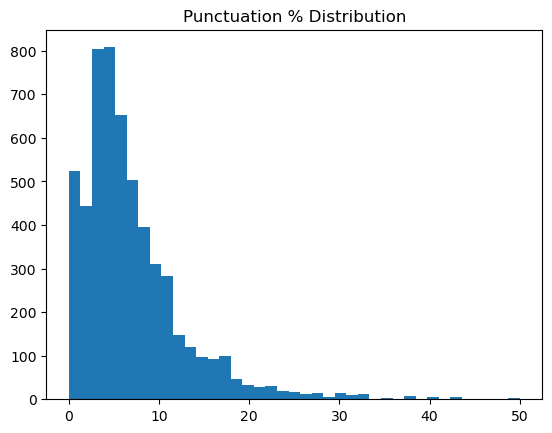

In [153]:
bins = np.linspace(0,50,40)

pyplot.hist(data['punct%'],bins)
pyplot.title("Punctuation % Distribution")
pyplot.show()

- When we train a machine learning algorithm on untransformed data that is skewed and has outliers, the algorithm is more likely to learn the patterns in the outliers than the patterns in the main body of the data. This is because the outliers are more extreme and therefore more noticeable to the algorithm.
- So, whenever it encounters an email with longer body length, it is more likely for it to be classified as spam by the machine learning algorithm even if there are no spammy words in it.
- Whenever there exists skewness it is more likely for outliers to be present in it.

### Transformation


- Process that alters each data point in a certain column in a systematic way.

#### Tranformation Process

1. Determine what range of exponents to test.
2. Apply each transformation to each value of your chosen feature.
3. Use some criteria to determine which of the transformations yield the best distribution.

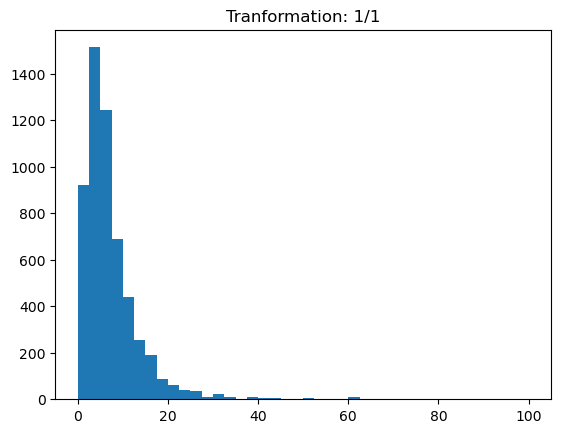

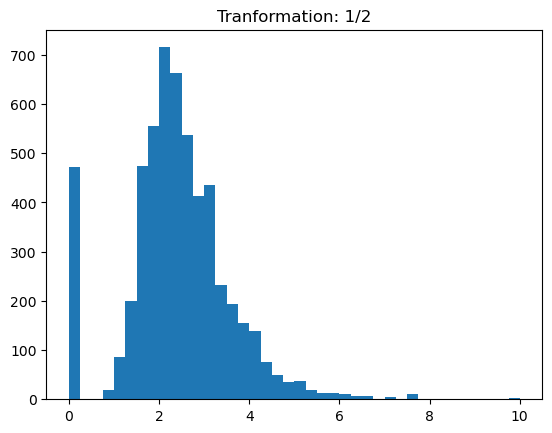

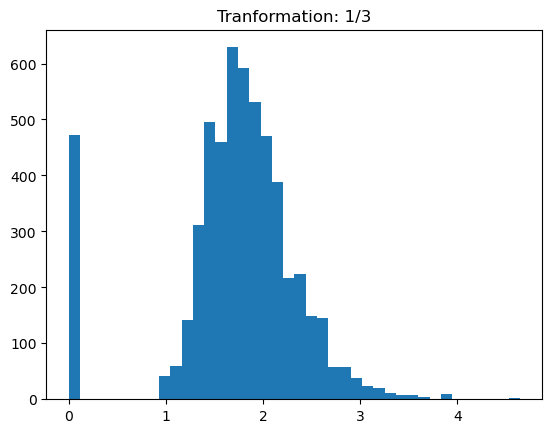

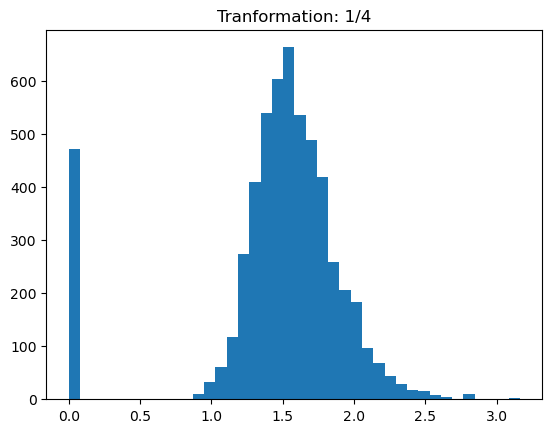

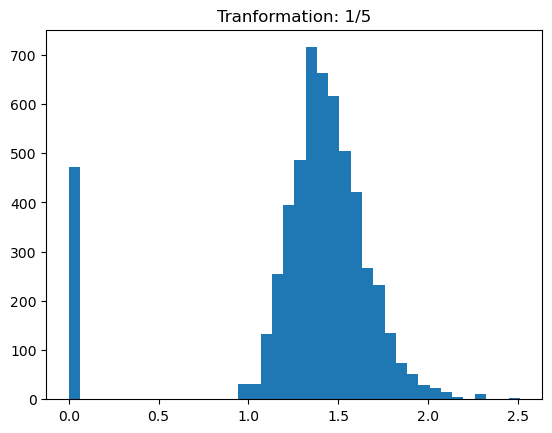

In [154]:
for i in [1,2,3,4,5]:
    pyplot.hist(data['punct%']**(1/i),bins=40)
    pyplot.title("Tranformation: 1/{}".format(str(i)))
    pyplot.show()

## Machine Learning

- "The field of study that gives computers the ability to learn without being explicitely programmed" ~Arthur Sameul, 1959
- "A computer program is said to learn from experience E with respect to some task T and some perormance measure P, if its performance on T, as measured by P, improves with experience E."~Tom Mitchell, 1998
- "Algorithms that 'can figure out how to perform important tasks by generalizing from examples'"~University of Washington, 2012
- "Practice of using algorithms to parse data,learn from it, and then make a determination or prediction about something in the world"~NVIDA, 2016

## Two Broad Types of Machine Learning

### Supervised Learning

- Inferring a function from labeled training data to make predictions on unseen data
- Ex- Predict whether any given email is spam based on known information about the email 

### Unsupervised Learning

- Deriving structure from data where we don't know the effect of any of the variables, you dont know what you're trying to predict neccesarily
- Ex- Based on the content of an email, group similar emails together in distinct folders

### Holdout Test Set

- Sample of data not used in fitting a model for the purpose of evaluating the model's ability to generalize unseen data

### K-Fold Cross-Validation

- The full data set is divided into k-subsets and the holdout method is repeated k times.Each time, one of the k-subsets is used as the test set and the other k-1 subsets are put together to be used to train the model.

### Evaluation Metrics

- Accuracy = Number of outcomes predicted correctly/Total number of observations
- Precision = Number of outcomes that are predicted as spam and are actually spam/Total number of outcomes predicted as spam
- Recall = Number of outcomes predicted as spam that are actually spam/Total number of outcomes that are actually spam

## Ensemble Method

- Technique that creates multiple models and then combines them to produce better results than any of the single models individually.
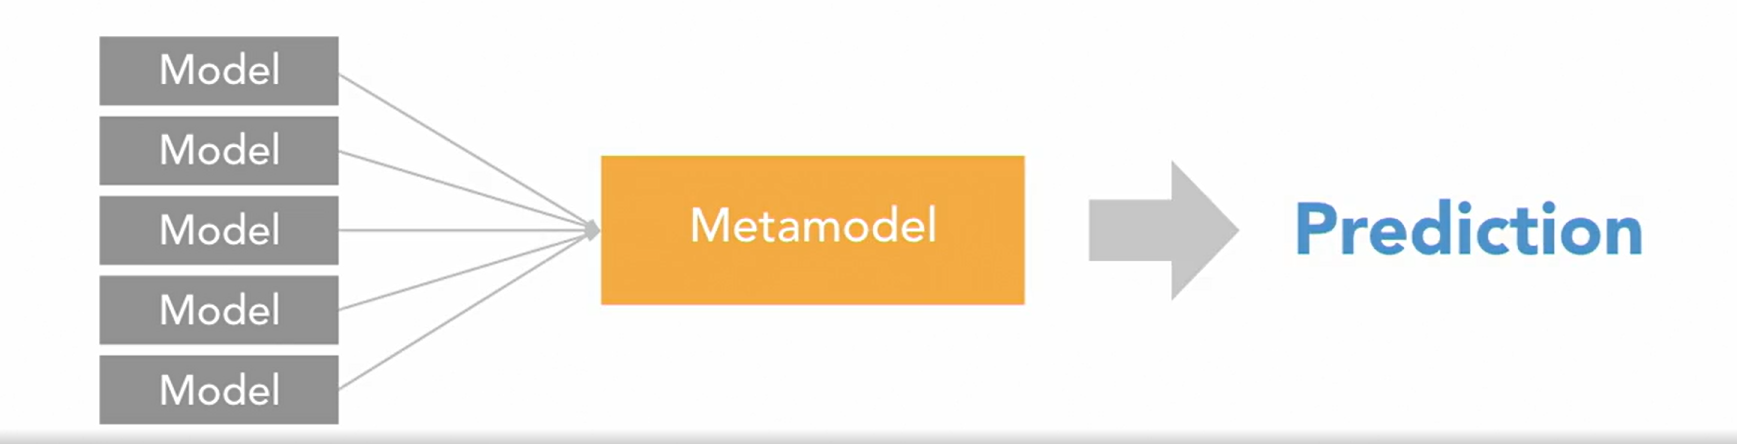

### Random Forest

- Ensemble learning method that constructs a collection of decision trees and then aggregates the prediction of each tree to determine the final prediction


### Benefits of Ensemble Methods

- Can be used for classification or regression 
- Easily handles outliers, missing values etc.
- Accepts various types of inputs (continous, ordinal, etc.)
- Less likely to overfit
- Outputs feature importance

### Building Machine Learning Classifiers: Building a basic Random Forest model

#### Read in and clean text

In [155]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))


def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidif_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1) #concatenating along columns
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier Attributes & Hyperparameters

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [160]:
print(dir(RandomForestClassifier)) #Attributes and methods of this object

['__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_n_features', '_compute_oob_predictions', '_estimator_type', '_get_oob_predictions', '_get_param_names', '_get_tags', '_make_estimator', '_more_tags', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_set_oob_score_and_attributes', '_validate_X_predict', '_validate_data', '_validate_estimator', '_validate_y_class_weight', 'apply', 'decision_path', 'feature_importances_', 'fit', 'get_params', 'n_features_', 'predict', 'predict_log_proba', 'predict_proba', 'score',

In [158]:
print(RandomForestClassifier()) #Hyperparameters

RandomForestClassifier()


### Explore RandomForestClassifier through Cross-Validation

In [161]:
from sklearn.model_selection import KFold, cross_val_score

In [162]:
rf = RandomForestClassifier(n_jobs=-1)

In [163]:
k_fold=KFold(n_splits=5)

In [164]:
cross_val_score(rf,X_features,data['label'],cv=k_fold,scoring='accuracy',n_jobs=-1)

array([0.97396768, 0.97935368, 0.97394429, 0.96495957, 0.97124888])

### Building Machine Learning Classifiers: Random Forest on a holdout test set

### Read in & clean text

In [1]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns=['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x)-x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer=clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'],data['punct%'],pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore RandomForestClassifier through Holdout Set

In [2]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size=0.2)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [5]:
sorted(zip(rf_model.feature_importances_, X_train.columns), reverse=True)[0:10]

[(0.06323879732668924, 'body_len'),
 (0.032242648895549585, 5724),
 (0.030208924899841776, 3134),
 (0.026318028655055697, 7027),
 (0.025622217854842734, 1803),
 (0.024076058085388267, 7350),
 (0.023569485216354515, 6285),
 (0.02228164704611551, 4796),
 (0.02138832122266029, 2031),
 (0.018056476970037073, 6746)]

In [6]:
y_pred = rf_model.predict(X_test)

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [7]:
precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')

In [8]:
print('Precision: {} / Recall: {} / Accuracy: {}'.format(round(precision, 3),
                                                        round(recall, 3),
                                                        round((y_pred==y_test).sum() / len(y_pred), 3)))

Precision: 1.0 / Recall: 0.577 / Accuracy: 0.941


## Building Machine Learning Classifiers: Explore Random Forest model with grid-search

- Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model.

### Read in & clean text

In [9]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")),3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())],axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Build our own Grid-search

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_features, data['label'], test_size = 0.2)

In [15]:
def train_RF(n_est, depth):
    rf = RandomForestClassifier(n_estimators = n_est, max_depth = depth, n_jobs = -1)
    rf_model = rf.fit(X_train, y_train)
    y_pred = rf_model.predict(X_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label = 'spam', average='binary')
    print('Est: {} / Depth: {} ----- Precision: {} / Recall: {} / Accuracy: {}'.format(
            n_est, depth, round(precision, 3), round(recall, 3),
            round((y_pred==y_test).sum() / len(y_pred), 3)))   

In [16]:
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 10 / Depth: 10 ----- Precision: 1.0 / Recall: 0.217 / Accuracy: 0.893


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 10 / Depth: 20 ----- Precision: 1.0 / Recall: 0.599 / Accuracy: 0.945


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 10 / Depth: 30 ----- Precision: 1.0 / Recall: 0.697 / Accuracy: 0.959


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 10 / Depth: None ----- Precision: 1.0 / Recall: 0.757 / Accuracy: 0.967


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 50 / Depth: 10 ----- Precision: 1.0 / Recall: 0.197 / Accuracy: 0.89


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 50 / Depth: 20 ----- Precision: 1.0 / Recall: 0.553 / Accuracy: 0.939


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 50 / Depth: 30 ----- Precision: 1.0 / Recall: 0.658 / Accuracy: 0.953


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 50 / Depth: None ----- Precision: 1.0 / Recall: 0.789 / Accuracy: 0.971


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 100 / Depth: 10 ----- Precision: 1.0 / Recall: 0.217 / Accuracy: 0.893


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 100 / Depth: 20 ----- Precision: 1.0 / Recall: 0.546 / Accuracy: 0.938


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


Est: 100 / Depth: 30 ----- Precision: 1.0 / Recall: 0.664 / Accuracy: 0.954
Est: 100 / Depth: None ----- Precision: 1.0 / Recall: 0.789 / Accuracy: 0.971


C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


## Building Machine Learning Classifiers: Evaluate Random Forest with GridSearchCV

- Grid-search: Exhaustively search all parameter combinations in a given grid to determine the best model.
- Cross-validation: Divide a dataset into k subsets and repeat the holdout method k times where a different subset is used as the holdout set in each iteration.

In [17]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3)

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

# TF-IDF
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)

# CountVectorizer
count_vect = CountVectorizer(analyzer = clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis = 1)

X_count_feat.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,0.047,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,0.041,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,0.032,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,0.071,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,0.044,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploring parameter settings using GridSearchCV

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
rf = RandomForestClassifier()
param = {'n_estimators': [10,150,300],
        'max_depth': [30,60,90,None]} 
# Key-values will be the parameter name and values will be the ranges that we want to explore

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,59.899863,1.382863,1.183355,0.346717,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.975763,0.974843,0.968553,0.974843,0.974312,0.003045,1
10,31.438735,0.770713,0.561818,0.159900,None,150,"{'max_depth': None, 'n_estimators': 150}",0.977558,0.977558,0.973046,0.968553,0.973046,0.973952,0.003370,2
7,31.402006,1.973709,0.606634,0.100369,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.977558,0.976661,0.974843,0.969452,0.969452,0.973593,0.003493,3
3,4.144768,0.378651,0.268092,0.046345,60,10,"{'max_depth': 60, 'n_estimators': 10}",0.979354,0.977558,0.971249,0.966757,0.969452,0.972874,0.004811,4
11,52.514307,1.493802,0.510647,0.067938,None,300,"{'max_depth': None, 'n_estimators': 300}",0.976661,0.974865,0.973944,0.966757,0.970350,0.972515,0.003538,5


- mean_fit_time: is the average time it takes each model to fit
- mean_score_time: is the average amount of time it takes each model takes to make a prediction on the test set
- mean_test_score: is the average accuracy on the test set
- mean_train_score: is the average accuracy on the train set

- Deepest decision trees show good accuracy
- Number of decision trees does not matter

In [20]:
rf = RandomForestClassifier()
param = {'n_estimators':[10,150,300],
        'max_depth':[30,60,90,None]}

gs = GridSearchCV(rf, param, cv=5, n_jobs=-1)
gs_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(gs_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
6,5.487662,0.354922,0.305924,0.050627,90,10,"{'max_depth': 90, 'n_estimators': 10}",0.976661,0.973968,0.975741,0.963163,0.976640,0.973234,0.005130,1
11,49.673130,1.812033,0.401918,0.086370,None,300,"{'max_depth': None, 'n_estimators': 300}",0.977558,0.973968,0.973046,0.968553,0.971249,0.972875,0.002983,2
10,32.180768,0.829909,0.594715,0.269756,None,150,"{'max_depth': None, 'n_estimators': 150}",0.975763,0.973968,0.973944,0.967655,0.969452,0.972156,0.003068,3
7,32.802664,3.354528,0.711978,0.184504,90,150,"{'max_depth': 90, 'n_estimators': 150}",0.973968,0.973968,0.973046,0.966757,0.971249,0.971797,0.002709,4
8,63.505411,1.043977,1.009474,0.157124,90,300,"{'max_depth': 90, 'n_estimators': 300}",0.977558,0.970377,0.973944,0.968553,0.968553,0.971797,0.003489,4


## Gradient Boosting

- Ensemble learning method that takes an iterative approach to combining weak learners to create a string learner by focusing on mistakes of prior iterations

### Trade-Offs of Gradient Boosting

- Pros
    - Extremely powerful
    - Accepts various types of inputs
    - Can be used for classification or regression
    - Outputs feature importance
- Cons
    - Longer to train (can't parallelize)
    - More likely to overfit
    - More difficult to properly tune 

### Building Machine Learning Classifiers: Explore Gradient Boosting model with grid-search

### Read in & clean text

In [22]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count / (len(text) - text.count(" ")), 3)*100

data['body_len'] = data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])

X_features = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis=1)
X_features.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,4.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,28,7.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,135,4.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Explore GradientBoostingClassifier Attributes & Hyperparameters

In [23]:
from sklearn.ensemble import GradientBoostingClassifier

In [24]:
print(dir(GradientBoostingClassifier))

['_SUPPORTED_LOSS', '__abstractmethods__', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_check_feature_names', '_check_initialized', '_check_n_features', '_check_params', '_clear_state', '_compute_partial_dependence_recursion', '_estimator_type', '_fit_stage', '_fit_stages', '_get_param_names', '_get_tags', '_init_state', '_is_initialized', '_make_estimator', '_more_tags', '_raw_predict', '_raw_predict_init', '_repr_html_', '_repr_html_inner', '_repr_mimebundle_', '_required_parameters', '_resize_state', '_staged_raw_predict', '_validate_data', '_validate_estimator', '_validate_y', '_warn_ma

In [25]:
print(GradientBoostingClassifier())

GradientBoostingClassifier()


### Build our own Grid-search

In [26]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_features,data['label'],test_size=0.2)

In [31]:
def train_GB(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators=est, max_depth= max_depth, learning_rate=lr)
    gb_model = gb.fit(X_train, y_train)
    y_pred = gb_model.predict(y_test)
    precision, recall, fscore, support = score(y_test, y_pred, pos_label='spam', average='binary')
    print(" Est: {} / Depth: {} / LR: {} --- Precision: {} / Recall: {} / Accuracy: {} ".format(
        est, max_depth, lr, round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

In [33]:
'''for n_est in [50, 100, 150]:
    for max_depth in [3, 7, 11, 15]:
        for lr in [0.01, 0.1, 1]:
            train_GB(n_est, max_depth, lr)'''

'for n_est in [50, 100, 150]:\n    for max_depth in [3, 7, 11, 15]:\n        for lr in [0.01, 0.1, 1]:\n            train_GB(n_est, max_depth, lr)'

### Evaluate Gradient Boosting with GridSearchCV

### Read in text

In [34]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

#TF_IDF
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
X_tfidf = tfidf_vect.fit_transform(data['body_text'])
X_tfidf_feat = pd.concat([data['body_len'],data['punct%'], pd.DataFrame(X_tfidf.toarray())], axis = 1)

#CountVectorizer
count_vect = CountVectorizer(analyzer = clean_text)
X_count = count_vect.fit_transform(data['body_text'])
X_count_feat = pd.concat([data['body_len'], data['punct%'], pd.DataFrame(X_count.toarray())], axis = 1)

X_count_feat.head()


,body_len,punct%,0,1,2,3,4,5,6,7,...,8094,8095,8096,8097,8098,8099,8100,8101,8102,8103
0,128,4.7,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,49,4.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,62,3.2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,28,7.1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,135,4.4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Exploring parameter settings using GridSearchCV

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

In [36]:
gb = GradientBoostingClassifier()

param = {
    'n_estimators': [100, 150],
    'max_depth': [7,11,15],
    'learning_rate': [0.1]
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(X_tfidf_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,666.877798,2.119546,0.310665,0.035781,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.966786,0.975763,0.974843,0.968553,0.966757,0.970540,0.003953,1
3,492.146950,41.897815,0.799126,0.297205,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.966786,0.977558,0.969452,0.970350,0.966757,0.970181,0.003956,2
1,257.167309,1.604574,0.717423,0.155534,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.965889,0.977558,0.971249,0.965858,0.967655,0.969642,0.004418,3
4,428.561844,18.193521,0.476063,0.039760,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.964093,0.973968,0.969452,0.969452,0.967655,0.968924,0.003192,4
0,172.867466,0.670331,0.569773,0.162197,0.1,7,100,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.963196,0.977558,0.968553,0.967655,0.967655,0.968923,0.004706,5


In [37]:
gb = GradientBoostingClassifier()

param = {
    'n_estimators': [100,150],
    'max_depth':[7,11,15],
    'learning_rate':[0.1]
}

gs = GridSearchCV(gb, param, cv=5, n_jobs=-1)
cv_fit = gs.fit(X_count_feat, data['label'])
pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending=False)[0:5]

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,432.138757,5.780118,0.695026,0.154817,0.1,11,150,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.965889,0.977558,0.970350,0.964960,0.971249,0.970001,0.004497,1
5,484.726651,3.297302,0.303909,0.016869,0.1,15,150,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.962298,0.977558,0.968553,0.967655,0.972147,0.969642,0.005060,2
1,307.662536,14.182554,0.919350,0.509474,0.1,7,150,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",0.965889,0.978456,0.971249,0.963163,0.966757,0.969103,0.005352,3
4,350.313712,6.989739,0.606454,0.150451,0.1,15,100,"{'learning_rate': 0.1, 'max_depth': 15, 'n_est...",0.962298,0.975763,0.967655,0.964960,0.972147,0.968565,0.004853,4
2,286.131121,8.094494,0.633613,0.133521,0.1,11,100,"{'learning_rate': 0.1, 'max_depth': 11, 'n_est...",0.964093,0.976661,0.968553,0.961366,0.970350,0.968205,0.005290,5


### Machine Learning Pipeline

- Read in raw text.
- Clean text and tokenize
- Feature engineering
- Fit simple model
- Tune hyperparameters and evaluate with GridSearchCV
- Final model selection

### Process 

1. Split the data into training and test set
2. train vectorizers on training set and use that to transform test set.
3. Fit best random forest model and best gradient boosting model on training set and predict on test set
4. Thoroughly evaluate results of these two models to select best model

### Building Machine Learning Classifiers: Model selection

### Read in text

In [38]:
import nltk
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import string

stopwords = nltk.corpus.stopwords.words('english')
ps = nltk.PorterStemmer()

data = pd.read_csv("C:\\Users\\birad\\OneDrive\\Documents\\SMSSpamCollection.tsv",sep='\t')
data.columns = ['label','body_text']

def count_punct(text):
    count = sum([1 for char in text if char in string.punctuation])
    return round(count/(len(text) - text.count(" ")), 3)*100

data['body_len']=data['body_text'].apply(lambda x: len(x) - x.count(" "))
data['punct%'] = data['body_text'].apply(lambda x: count_punct(x))

def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+',text)
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text


### Split into train/test

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['body_text','body_len','punct%']],data['label'],test_size=0.2)

### Vectorize text

In [46]:
tfidf_vect = TfidfVectorizer(analyzer = clean_text)
tfidf_vect_fit = tfidf_vect.fit(X_train['body_text'])

tfidf_train = tfidf_vect_fit.transform(X_train['body_text'])
tfidf_test = tfidf_vect_fit.transform(X_test['body_text'])

X_train_vect = pd.concat([X_train[['body_len','punct%']].reset_index(drop=True),
                          pd.DataFrame(tfidf_train.toarray())], axis =1)
X_test_vect = pd.concat([X_test[['body_len','punct%']].reset_index(drop=True),
          pd.DataFrame(tfidf_test.toarray())], axis =1)

X_train_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,72,8.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,35,2.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,62,3.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,126,2.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
X_test_vect.head()

,body_len,punct%,0,1,2,3,4,5,6,7,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
0,109,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56,14.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,52,9.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,110,6.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,127,4.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Final evaluation of models

In [43]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

In [52]:
rf = RandomForestClassifier(n_estimators=150, max_depth=None, n_jobs=-1)

start = time.time()
rf_model = rf.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = rf_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)


precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print(" Fit time {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {} ".format(round(fit_time, 3), round(pred_time, 3),
        round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


 Fit time 3.065 / Predict time: 0.251 ---- Precision: 1.0 / Recall: 0.831 / Accuracy: 0.978 


In [54]:
gb = GradientBoostingClassifier(n_estimators=150, max_depth=11)

start = time.time()
gb_model = gb.fit(X_train_vect, y_train)
end = time.time()
fit_time = (end - start)

start = time.time()
y_pred = gb_model.predict(X_test_vect)
end = time.time()
pred_time = (end - start)


precision, recall, fscore, train_support = score(y_test, y_pred, pos_label='spam', average='binary')
print(" Fit time {} / Predict time: {} ---- Precision: {} / Recall: {} / Accuracy: {} ".format(round(fit_time, 3), round(pred_time, 3),
        round(precision, 3), round(recall, 3),
        round((y_pred==y_test).sum() / len(y_pred), 3)))

C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\birad\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


 Fit time 208.104 / Predict time: 0.231 ---- Precision: 0.909 / Recall: 0.878 / Accuracy: 0.972 


### Two Final Points

- Further evaluation 
    - Slice test set
    - Examine text messages the model is getting wrong
- Results trade-off - consider business context
    - Is predict time of 0.213 vs. 0.135 going to create a bottleneck?
    - Precision/recall
        - Spam filter - optimize for precision
        - Antivirus software - optimize for recall